In [1]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 KB 6.4 MB/s eta 0:00:00


In [2]:
# pip install git+https://github.com/RJT1990/pyflux

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dabl
import calendar
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
import glob
import os
import pathlib
import sys
import logging
import pickle
from google.cloud import storage
# from google.cloud import aiplatform
import numpy as np
import pandas as pd
from prophet import Prophet
import sklearn
from sklearn.model_selection import train_test_split

logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# **Monthly figures for traffic accidents: Exploratory Data Analysis**
### Monatszahlen Verkehrsunfälle

**Data Description:** The data set *Monatszahlen Verkehrsunfälle* is a monthly traffic accident statistics dataset for Munich, Germany. The dataset covers the period from January 2015 to September 2022 and provides information on the number of traffic accidents that occurred in each month.  it figures contains the topics

* traffic accidents
* escape accidents (hit-and-run accidents)
* alcohol accidents

**Attribute Information:**
 In Dataset, it has 9 attributes
* MONATSZAHL (Category)  *(categorical)*
* AUSPRÄGUNG (Accident type) *(categorical)*
* JAHR (Year)   *(numerical)*
* MONAT (Month) *(numerical-string format)*
* WERT (Value) *(numerical)*
* VORJAHRESWERT (Previous_Year_value) *(numerical)*
* VERÄND_VORMONAT_PROZENT (Change_previous_month_percent) *(numerical)*
* VERÄND_VORJAHRESMONAT_PROZENT (Change_previous_month_percent) *(numerical)*
* ZWÖLF_MONATE_MITTELWERT (twelve_month_mean) *(numerical)*

The dataset can be used to analyze trends and patterns in traffic accidents in Munich over time, as well as to identify factors that contribute to the occurrence of traffic accidents, such as weather and road conditions.

Ref: https://opendata.muenchen.de/dataset/monatszahlen-verkehrsunfaelle 

## **Data Preparation**

In [120]:
dataset_path = r'https://storage.googleapis.com/dataset_traffic_accidents_dps/Monatszahlen_Verkehrsunf%C3%A4lle.csv'
df = pd.read_csv(dataset_path)


In [114]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


how many data-points and features?

In [122]:
df.shape

(2086, 9)

What are the column names in our dataset?

In [123]:
df.columns

Index(['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERÄND_VORMONAT_PROZENT', 'VERÄND_VORJAHRESMONAT_PROZENT',
       'ZWÖLF_MONATE_MITTELWERT'],
      dtype='object')

In [124]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [125]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONATSZAHL                     2086 non-null   object 
 1   AUSPRÄGUNG                     2086 non-null   object 
 2   JAHR                           2086 non-null   int64  
 3   MONAT                          2086 non-null   object 
 4   WERT                           2002 non-null   float64
 5   VORJAHRESWERT                  1995 non-null   float64
 6   VERÄND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERÄND_VORJAHRESMONAT_PROZENT  1910 non-null   float64
 8   ZWÖLF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 146.8+ KB


In [126]:
# Process the data - considering first 5 columns
#Select only important columns
features = ['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT']
#Make the data only the important columns
df = df[features]



In [127]:
# Rename the columns we will be working on 
df = df.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRÄGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

In [128]:
df.head()

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [129]:
df.shape

(2086, 5)

In [130]:
data = df.copy() #saved raw copy to use it later

In [98]:
df['Category'].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [99]:
df['Accident_Type'].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [100]:
df['Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000])

In [101]:
df['Month'].unique()

array(['202201', '202202', '202203', '202204', '202205', '202206',
       '202207', '202208', '202209', '202210', '202211', '202212',
       'Summe', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111',
       '202112', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '20150

In [102]:
# check for empty values in each column
df.isnull().any()

Category         False
Accident_Type    False
Year             False
Month            False
Value             True
dtype: bool

In [103]:
# check for non-numeric values
numeric_cols = ['Year', 'Month', 'Value']
for col in numeric_cols:
    # replace Non-numeric value and empty values with NaN
    # data[col] = pd.to_numeric(data[col], downcast="integer", errors='coerce').astype('Int64') # to avoid creating copy of it/ new dataframe
    df.loc[:, col] = pd.to_numeric(df[col],downcast="integer", errors='coerce').astype('Int64')   #modifying the original DataFrame and not a copy of it.

# drop rows with missing values in the numeric columns
df = df.dropna(subset=numeric_cols).reset_index(drop=True)

# check for missing values after dropping
print(df[numeric_cols].isnull().any())

Year     False
Month    False
Value    False
dtype: bool


In [104]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y%m').dt.month
# df['Month'] = pd.to_numeric(df['Month'].astype(str).str[-2:], errors='coerce')
df.head()

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2021,1,16
1,Alkoholunfälle,insgesamt,2021,2,14
2,Alkoholunfälle,insgesamt,2021,3,24
3,Alkoholunfälle,insgesamt,2021,4,16
4,Alkoholunfälle,insgesamt,2021,5,24


In [105]:
df_with_2022 = df.copy()
df= df[df["Year"]<=2020].reset_index(drop=True)
# data_2020=data_2020.reset_index(drop=True)

In [106]:
df.drop(df[df["Month"]=="Summe"].index,inplace=True)
df.head()

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,1,28
1,Alkoholunfälle,insgesamt,2020,2,40
2,Alkoholunfälle,insgesamt,2020,3,27
3,Alkoholunfälle,insgesamt,2020,4,26
4,Alkoholunfälle,insgesamt,2020,5,40


In [24]:
df.shape

(1764, 5)

In [25]:
df.isnull().sum()

Category         0
Accident_Type    0
Year             0
Month            0
Value            0
dtype: int64

In [26]:
df.Year.value_counts()

2020    84
2019    84
2018    84
2017    84
2016    84
2015    84
2014    84
2013    84
2012    84
2011    84
2010    84
2009    84
2008    84
2007    84
2006    84
2005    84
2004    84
2003    84
2002    84
2001    84
2000    84
Name: Year, dtype: Int64

In [27]:
df.Category.value_counts()

Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: Category, dtype: int64

## **Data Analysis and Visualization**

Number of accident per year by Category

In [28]:
(df.groupby([df.Year,df.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Year,,,
2000,24,24,36
2001,24,24,36
2002,24,24,36
2003,24,24,36
2004,24,24,36
2005,24,24,36
2006,24,24,36
2007,24,24,36
2008,24,24,36


Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: Category, dtype: int64


<Axes: >

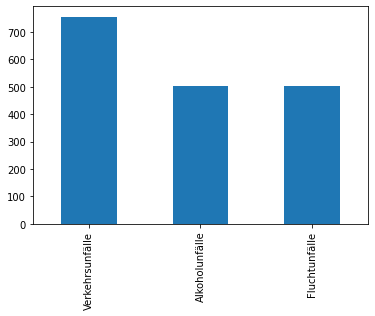

In [29]:
print(df['Category'].value_counts())
df['Category'].value_counts().plot(kind='bar')

Observation: From the above analysis Verkehrsunfälle accidents are high in all years.

Number of accident per Month by Category

In [30]:
(df.groupby([df.Month,df.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Month,,,
1,42,42,63
2,42,42,63
3,42,42,63
4,42,42,63
5,42,42,63
6,42,42,63
7,42,42,63
8,42,42,63
9,42,42,63


<Axes: >

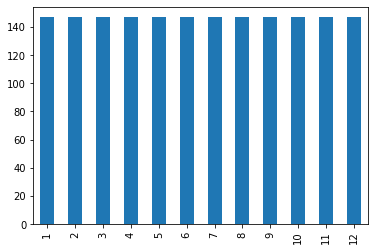

In [31]:
df['Month'].value_counts().plot(kind='bar')

observation: From the above graph all the months are sharing equal number of accidents.

In [32]:
(df.groupby([df["Accident_Type"],df.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Accident_Type,,,
Verletzte und Getötete,252.0,252.0,252.0
insgesamt,252.0,252.0,252.0
mit Personenschäden,NaN,NaN,252.0


<Axes: >

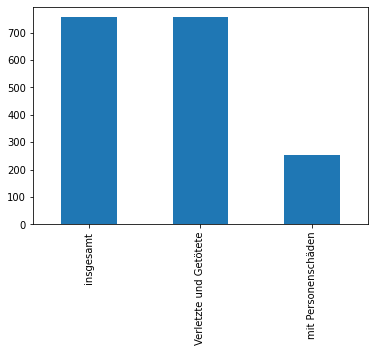

In [33]:
df['Accident_Type'].value_counts().plot(kind='bar')

Observation: From the above graph insgesamt and Verletzte und Getötete accidents are more than mit Personenschäden accidents

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Value', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=6.95E-02'}, xlabel='Month (jittered)', ylabel='Value'>,
         <Axes: title={'center': 'F=-5.30E-02'}, xlabel='Year (jittered)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.68E-01'}, xlabel='Value', ylabel='Category'>,
         <Axes: title={'center': 'F=5.00E-01'}, xlabel='Value', ylabel='Accident_Type'>]],
       dtype=object)]

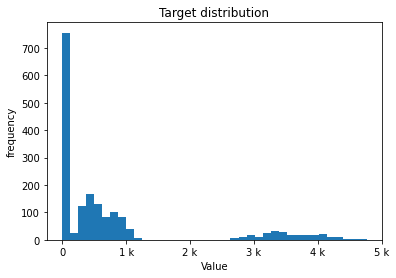

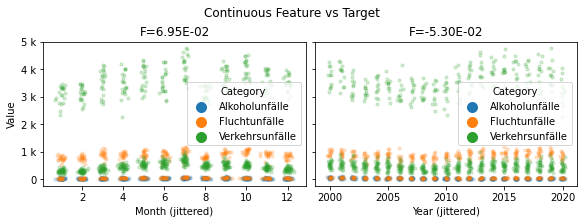

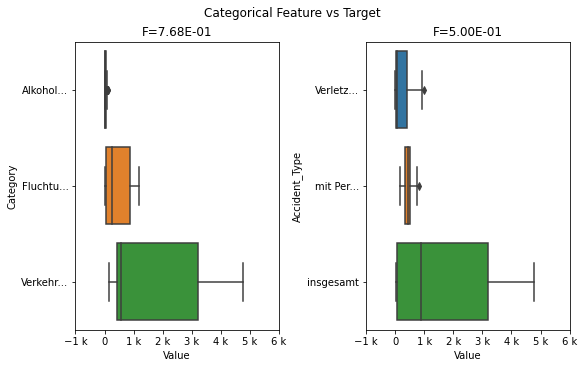

In [34]:
# Visualizing dataset using dabl library
import dabl
dabl.plot(df, target_col='Value')

Observation: Using just one line of code, we can visualize the relationships between input features and a target variable.

Association between the ‘Category’ column and target ‘Value’

<function matplotlib.pyplot.show(close=None, block=None)>

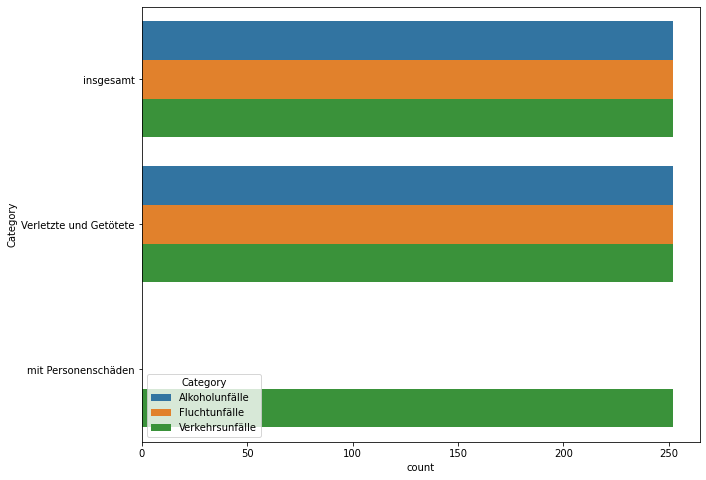

In [35]:
# plot the bar plot of Category and Accident-type
plt.figure(figsize=(10,8))
sns.countplot(y='Accident_Type', hue='Category', data=df)
plt.ylabel('Category')
plt.yticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

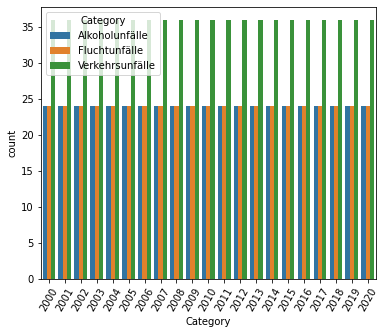

In [39]:
# plot the bar plot of Category and year
plt.figure(figsize=(6,5))
sns.countplot(x='Year', hue='Category', data=df)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

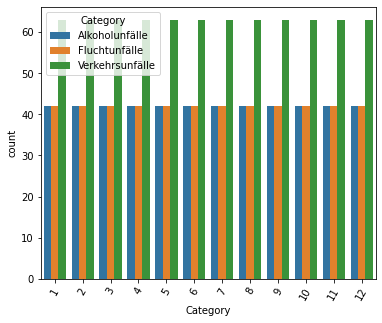

In [40]:
# plot the bar plot of Category and Month
plt.figure(figsize=(6,5))
sns.countplot(x='Month', hue='Category', data=df)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

Observation: From the all above visualization we observining the Verkehrsunfälle Accident category the maximun times happend.

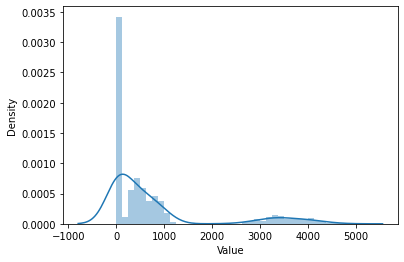

In [41]:
sns.distplot(df.Value)
plt.show()

<Axes: >

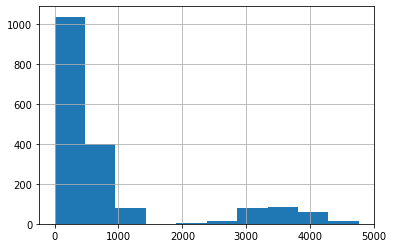

In [37]:
df.Value.hist()

Observation: 
* From the above graph the target column data is not normally disributed.

* ML models work very well in the case of non-normally distributed data also. Models like decision tree, Random forest and XgBoost etc. Don’t assume any normality and work on raw data as well.

Co-relation Matrix

<Axes: >

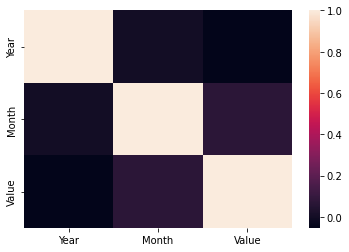

In [42]:
corr = df.corr(method = 'spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [78]:
df_with_2022.head()

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2021,1,16
1,Alkoholunfälle,insgesamt,2021,2,14
2,Alkoholunfälle,insgesamt,2021,3,24
3,Alkoholunfälle,insgesamt,2021,4,16
4,Alkoholunfälle,insgesamt,2021,5,24


In [87]:
df_with_2022

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2021,1,16
1,Alkoholunfälle,insgesamt,2021,2,14
2,Alkoholunfälle,insgesamt,2021,3,24
3,Alkoholunfälle,insgesamt,2021,4,16
4,Alkoholunfälle,insgesamt,2021,5,24
...,...,...,...,...,...
1843,Verkehrsunfälle,Verletzte und Getötete,2000,8,647
1844,Verkehrsunfälle,Verletzte und Getötete,2000,9,675
1845,Verkehrsunfälle,Verletzte und Getötete,2000,10,615
1846,Verkehrsunfälle,Verletzte und Getötete,2000,11,578


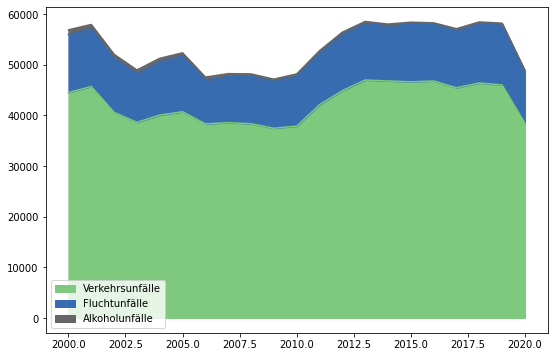

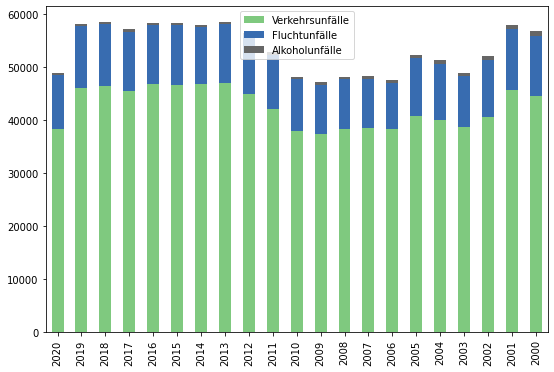

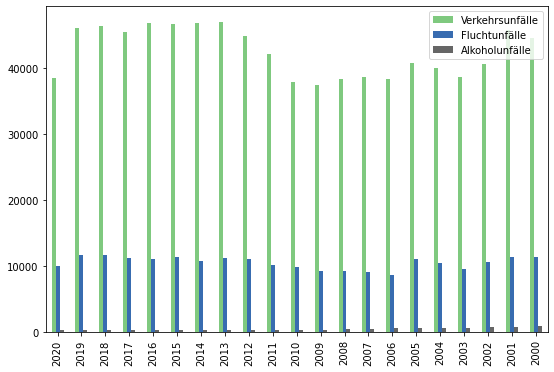

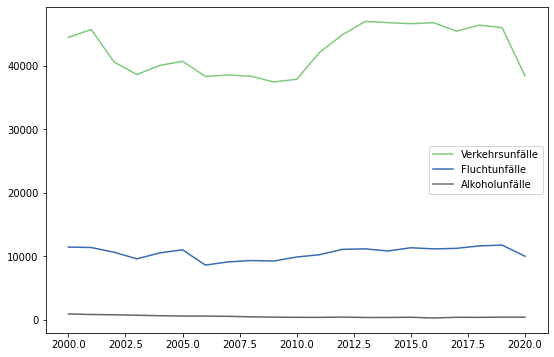

In [131]:
# Data Visualization

df_2020 = data[data['Year'] < 2021]

Verkehrsunfälle = df_2020[( (df_2020['Category'] == 'Verkehrsunfälle') & (df_2020['Month'] == 'Summe') & (df_2020['Accident_Type'] == 'insgesamt') )]
Fluchtunfälle = df_2020[((df_2020['Category'] == 'Fluchtunfälle') & (df_2020['Month'] == 'Summe') &(df_2020['Accident_Type'] == 'insgesamt') )]
Alkoholunfälle = df_2020[( (df_2020['Category'] == 'Alkoholunfälle') &(df_2020['Month'] == 'Summe') &(df_2020['Accident_Type'] == 'insgesamt') )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_category = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['Value'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['Value'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['Value'].to_numpy()  },
    index= years )

accidents_category.plot(kind='area',colormap='Accent',)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent', stacked= True)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent')
plt.gcf().set_size_inches(9,6)
accidents_category.plot(colormap='Accent')
plt.gcf().set_size_inches(9,6)

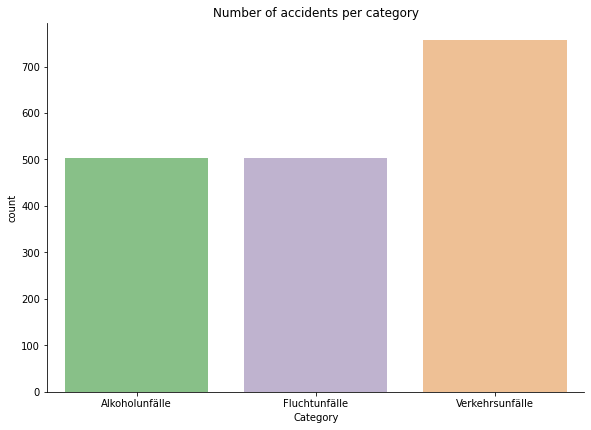

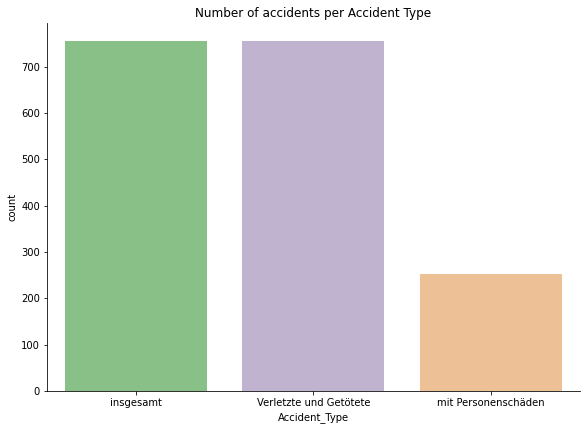

In [56]:
# Plot Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=df, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=df, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)

In [ ]:
df

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,1,28
1,Alkoholunfälle,insgesamt,2020,2,40
2,Alkoholunfälle,insgesamt,2020,3,27
3,Alkoholunfälle,insgesamt,2020,4,26
4,Alkoholunfälle,insgesamt,2020,5,40
...,...,...,...,...,...
1759,Verkehrsunfälle,Verletzte und Getötete,2000,8,647
1760,Verkehrsunfälle,Verletzte und Getötete,2000,9,675
1761,Verkehrsunfälle,Verletzte und Getötete,2000,10,615
1762,Verkehrsunfälle,Verletzte und Getötete,2000,11,578


In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# # Load the dataset
# df = pd.read_csv('data.csv')
df_scaling = df.copy()
# Select the column to scale
features = ['Year',"Month",'Value']
for i in features:
  print('+'*30)
  print('column name:',i)
  col = df_scaling['Year']

  # Compute some descriptive statistics
  print('Mean:', round(col.mean(),2))
  print('Standard deviation:', round(col.std(),2))
  print('Minimum:', col.min())
  print('Maximum:', col.max())
  print('*'*20)
  # Create instances of each scaler
  scalers = [
      ('min-max', MinMaxScaler()),
      ('standard', StandardScaler()),
      ('normalize', Normalizer())
  ]

  # Scale the column using each scaler and print some statistics
  for name, scaler in scalers:
      scaled_col = scaler.fit_transform(col.values.reshape(-1, 1))
      print(name)
      print('Mean:', round(scaled_col.mean(),1))
      print('Standard deviation:', round(scaled_col.std(),2))
      print('Minimum:', round(scaled_col.min(),2))
      print('Maximum:', round(scaled_col.max(),2))
      print('-'*20)



++++++++++++++++++++++++++++++
column name: Year
Mean: 2010.0
Standard deviation: 6.06
Minimum: 2000
Maximum: 2020
********************
min-max
Mean: 0.5
Standard deviation: 0.3
Minimum: 0.0
Maximum: 1.0
--------------------
standard
Mean: 0.0
Standard deviation: 1.0
Minimum: -1.65
Maximum: 1.65
--------------------
normalize
Mean: 1.0
Standard deviation: 0.0
Minimum: 1.0
Maximum: 1.0
--------------------
++++++++++++++++++++++++++++++
column name: Month
Mean: 2010.0
Standard deviation: 6.06
Minimum: 2000
Maximum: 2020
********************
min-max
Mean: 0.5
Standard deviation: 0.3
Minimum: 0.0
Maximum: 1.0
--------------------
standard
Mean: 0.0
Standard deviation: 1.0
Minimum: -1.65
Maximum: 1.65
--------------------
normalize
Mean: 1.0
Standard deviation: 0.0
Minimum: 1.0
Maximum: 1.0
--------------------
++++++++++++++++++++++++++++++
column name: Value
Mean: 2010.0
Standard deviation: 6.06
Minimum: 2000
Maximum: 2020
********************
min-max
Mean: 0.5
Standard deviation: 0.3
Mi

Observation:

 Based on the statistics provided, I would suggest using the StandardScaler for the "Year" and "Month" columns and the MinMaxScaler for the "Value" column.

For the "Year" and "Month" columns, the values are numeric and have a range of 2000-2020. Using the StandardScaler will standardize the values to have a mean of 0 and a standard deviation of 1, which can help improve the performance of models that are sensitive to the scale of the features.

For the "Value" column, the values represent the number of accidents and have a range of unknown size. Using the MinMaxScaler will scale the values to the range of 0-1, which can help preserve the distribution of the data and ensure that all values fall within a specific range.

**I am not using Scaling method. I observe very bad results.**

In [46]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('fbprophet').setLevel(logging.ERROR)

In [50]:
# # Load the dataset
# List of category and accident type combinations to train models for
cat_acc_combos = [('Alkoholunfälle', 'insgesamt'), ('Fluchtunfälle', 'insgesamt'), ('Verkehrsunfälle', 'insgesamt')]


mse_tot,rmse_tot,mae_tot,r2_tot,cod_tot,evs_tot = [],[],[],[],[],[]
# Loop over each category and accident type combination
for cat, acc_type in cat_acc_combos:

    # Filter the data based on the selected category, accident type, month, and year
    year = 2020
    df_filtered = df[(df['Category'] == cat) & (df['Accident_Type'] == acc_type) & (df['Year'] <= year)] 
    # separate independent and dependent variables
    df_filtered_lr_models = df_filtered.copy()
    X = df_filtered_lr_models[['Year', 'Month']].values
    y = df_filtered_lr_models['Value'].values
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create a linear regression model
    lr_model = LinearRegression()
    # fit the model to the training data
    lr_model.fit(X_train, y_train)
    # make predictions on the testing data
    lr_y_pred = lr_model.predict(X_test)
    
    # Decision Tree Regressor model
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    dt_y_pred = dt_model.predict(X_test)

    # Random Forest Regressor model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_y_pred = rf_model.predict(X_test)

    #Gradient Boosted Trees model
    gbt_model =GradientBoostingRegressor()
    gbt_model.fit(X_train, y_train)
    # Make predictions on the testing data
    gbt_y_pred = gbt_model.predict(X_test)   

    # Support Vector Regressor model
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    svr_y_pred = svr_model.predict(X_test)

    # Support Vector Regressor model
    XGB_model = XGBRegressor()
    XGB_model.fit(X_train, y_train)
    XGB_y_pred = XGB_model.predict(X_test)

    # Support Vector Regressor model
    LGBMR_model = LGBMRegressor()
    LGBMR_model.fit(X_train, y_train)
    LGBMR_y_pred = LGBMR_model.predict(X_test)
    # Evaluate models
    models = {'Linear Regression': lr_y_pred, 'Decision Tree': dt_y_pred, 'Random Forest': rf_y_pred, 'SVR': svr_y_pred, 'GBT': gbt_y_pred,'XGB': XGB_y_pred,'LGBMR': LGBMR_y_pred}
    mse_sub_lst, rmse_sub_lst,mae_sub_lst,r2_sub_lst,cod_sub_lst,evs_sub_lst = [],[],[],[],[],[]
    for model_name, y_pred in models.items():
        mse = mean_squared_error(y_test, y_pred)
        mse_sub_lst.append(round(mse,2))
        rmse = mse ** 0.5
        rmse_sub_lst.append(round(rmse,2))
        mae = mean_absolute_error(y_test, y_pred)
        mae_sub_lst.append(round(mae,2))
        r2 = r2_score(y_test, y_pred)
        r2_sub_lst.append(round(r2,3))
        cod = 1 - (np.var(y_test - y_pred) / np.var(y_test))
        cod_sub_lst.append(round(cod,2))
        evs = explained_variance_score(y_test, y_pred)
        evs_sub_lst.append(round(evs,2))
    #----------------------------------------------
    # Randomized Search CV with  Regression model
    regressors = [RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(),LGBMRegressor()] 
    for i,model in enumerate(regressors):
        # set the hyperparameters to search over
        param_distributions = {
            'n_estimators': [100, 150, 200, 250, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt']    }

        # perform the random search
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
        random_search.fit(X_train, y_train)
        model_y_pred = random_search.predict(X_test)
        # print the best hyperparameters and the corresponding score
        # print('Best hyperparameters:', random_search.best_params_)
        # print('Best score:', random_search.best_score_)
        # use the best hyperparameters to fit the model and make predictions on the testing data
        # evaluate the model
        rs_cv_mse = mean_squared_error(y_test, model_y_pred)
        mse_sub_lst.append(round(rs_cv_mse,2))
        rs_cv_rmse = np.sqrt(rs_cv_mse)                 
        rmse_sub_lst.append(round(rs_cv_rmse,2))
        rs_cv_mae = mean_absolute_error(y_test, model_y_pred)
        mae_sub_lst.append(round(rs_cv_mae,2))
        rs_cv_r2 = r2_score(y_test, model_y_pred)
        r2_sub_lst.append(round(rs_cv_r2,3))
        rs_cv_cod = 1 - (np.var(y_test - model_y_pred) / np.var(y_test))
        cod_sub_lst.append(round(rs_cv_cod,2))
        rs_cv_evs = explained_variance_score(y_test, model_y_pred)
        evs_sub_lst.append(round(rs_cv_evs,2))      
  #---------------------------------------------          

    mse_tot.append(mse_sub_lst),rmse_tot.append(rmse_sub_lst),mae_tot.append(mae_sub_lst),r2_tot.append(r2_sub_lst),cod_tot.append(cod_sub_lst),evs_tot.append(evs_sub_lst)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[01:18:42] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[01:18:58] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[01:19:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_feat

In [51]:
cat_acc_combos = [('Alkoholunfälle', 'insgesamt'), ('Fluchtunfälle', 'insgesamt'), ('Verkehrsunfälle', 'insgesamt')]

# Loop over each category and accident type combination
for cat, acc_type in cat_acc_combos:

    # Filter the data based on the selected category, accident type, month, and year
    year = 2020
    df_filtered = df[(df['Category'] == cat) & (df['Accident_Type'] == acc_type) & (df['Year'] <= year)]
    #-------------------------------------------------------------------------------------------------
    # Aggregate the values for each month for the above filter using groupby and sum
    df_prophet = df_filtered.copy()
    monthly_values = df_prophet.groupby(['Year', 'Month'])['Value'].sum().reset_index()

    # rename the columns to work with Prophet
    monthly_values.rename(columns={'Value': 'y'}, inplace=True)
    monthly_values['ds'] = pd.to_datetime(monthly_values['Year'].astype(str) + monthly_values['Month'].astype(str), format='%Y%m')

    # Split the data into training and testing sets
    train_df, test_df = train_test_split(monthly_values, test_size=0.2, random_state=42)

    # create a Prophet model and fit it to the training data
    model = Prophet( weekly_seasonality=True,daily_seasonality=True )
    model.fit(train_df[['ds', 'y']])

    # create a dataframe with the dates for which we want to forecast the values
    future_dates = model.make_future_dataframe(periods=len(test_df), freq='MS', include_history=False)

    # get the forecasted values for the test data
    forecast = model.predict(future_dates)

    # get the forecasted values for the test data
    forecasted_values = forecast['yhat'].values

    # get the actual values for the test data
    actual_values = test_df['y'].values

    # compute the evaluation metrics for the test data
    prophet_mae = mean_absolute_error(actual_values, forecasted_values)
    prophet_mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100
    prophet_mse = mean_squared_error(actual_values, forecasted_values)
    prophet_rmse = mse**0.5
    prophet_cod = 1 - (np.var(actual_values - forecasted_values) / np.var(actual_values))
    prophet_evs = explained_variance_score(actual_values, forecasted_values)
    # compute the R2 score
    prophet_r2 = r2_score(actual_values, forecasted_values)

    #-------------------------------------------------------------------------------------------------

    #ARIMA
    df_ARIMA= df_filtered.copy()
    # Aggregate the values for each month for the above filter using groupby and sum
    monthly_values_ARIMA = df_ARIMA.groupby(['Year', 'Month'])['Value'].sum().reset_index()
    # rename the columns
    monthly_values_ARIMA.columns = ['year', 'month', 'y']
    monthly_values_ARIMA['y'] = monthly_values_ARIMA['y'].to_numpy().astype(float)   
    # Split the data into training and testing sets
    train_df, test_df = train_test_split(monthly_values_ARIMA, test_size=0.2, random_state=42)
    # ensure that the 'y' column is of the correct data type
    # train['y'] = train['y'].to_numpy().astype(float)
    # fit the ARIMA model
    model = ARIMA(train_df['y'], order=(1, 1, 1))
    model_fit = model.fit()

    # make predictions on the test set
    predictions = model_fit.forecast(len(test_df))

    # calculate the mean squared error and mean absolute error
    ARIMA_mse = mean_squared_error(test_df['y'], predictions)
    ARIMA_mae = mean_absolute_error(test_df['y'], predictions)
    ARIMA_mape = np.mean(np.abs(predictions - test_df['y'])/np.abs(test_df['y'])) * 100
    ARIMA_r2 = r2_score(test_df['y'], predictions)
    ARIMA_rmse = ARIMA_mse**0.5
    ARIMA_cod = 1 - (np.var(test_df['y'] - predictions) / np.var(test_df['y']))
    ARIMA_evs = explained_variance_score(test_df['y'], predictions)

    #----------------------------------------
    #SARIMA
    # fit the SARIMA model
    model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit()

    # make predictions on the test set
    predictions = model_fit.forecast(len(test_df))

    # calculate the mean squared error and mean absolute error
    SARIMA_mse = mean_squared_error(test_df['y'], predictions)
    SARIMA_mae = mean_absolute_error(test_df['y'], predictions)
    SARIMA_mape = np.mean(np.abs(predictions - test_df['y'])/np.abs(test_df['y'])) * 100
    # calculate the R2 score
    SARIMA_r2 = r2_score(test_df['y'], predictions)
    SARIMA_rmse =  SARIMA_mse**0.5
    SARIMA_cod = 1 - (np.var(test_df['y'] - predictions) / np.var(test_df['y']))
    SARIMA_evs = explained_variance_score(test_df['y'], predictions)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j6c_w44/6n4x7fux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j6c_w44/hv7ozjq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65213', 'data', 'file=/tmp/tmp4j6c_w44/6n4x7fux.json', 'init=/tmp/tmp4j6c_w44/hv7ozjq3.json', 'output', 'file=/tmp/tmp4j6c_w44/prophet_modelle9ddew1/prophet_model-20230317011930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j6c_w44/u_psrq3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j6c_w44/ebldxzwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

The choice of metrics to evaluate a regression model depends on the specific problem and the goals of the analysis. Here are some common metrics that can be used to evaluate the performance of a regression model:

* **Mean Squared Error (MSE):** Measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better performance.

* **Root Mean Squared Error (RMSE):** The square root of the MSE, expressed in the same units as the target variable. A lower RMSE indicates better performance.

* **Mean Absolute Error (MAE):** Measures the average absolute difference between the predicted values and the actual values. A lower MAE indicates better performance.

* **Median Absolute Error (MedAE):** Measures the median absolute difference between the predicted values and the actual values. This metric is less sensitive to outliers than the MAE.

* **R-squared (R2):** Measures the proportion of variance in the target variable that is explained by the model. R2 values range from 0 to 1, with higher values indicating better performance.

When evaluating your model, it is important to consider the specific requirements and constraints of the problem, such as the acceptable level of error, the range of values in the target variable, and the presence of outliers or imbalanced data. It is also recommended to compare the performance of your model to a baseline model or to other models to determine if it is performing well.

In [55]:
models = {'Linear Regression': lr_y_pred, 'Decision Tree': dt_y_pred, 'Random Forest': rf_y_pred, 'SVR': svr_y_pred, 'GBT': gbt_y_pred,'XGB': XGB_y_pred,'LGBMR': LGBMR_y_pred}
regressors = [RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(),LGBMRegressor()] 


cat_acc_combos = [('Alkoholunfälle', 'insgesamt'), ('Fluchtunfälle', 'insgesamt'), ('Verkehrsunfälle', 'insgesamt')]
# Loop over each category and accident type combination
for i, val in enumerate(cat_acc_combos):
    cat, acc_type = val
    x = PrettyTable()
    x.field_names = ["Category", "Accident_Type","Model","MSE","RMSE","MAE","R2","COD","EVS"]

    x.add_row([cat, acc_type,"Prophet",round(prophet_mse,2),round(prophet_rmse,2),round(prophet_mae,2),round(prophet_r2,3),round(prophet_cod,2),round(prophet_evs,2) ])
    x.add_row([cat, acc_type,"ARIMA",round(ARIMA_mse,2),round(ARIMA_rmse,2),round(ARIMA_mae,2),round(ARIMA_r2,3),round(ARIMA_cod,2),round(ARIMA_evs,2) ]) 
    x.add_row([cat, acc_type,"SARIMA",round(SARIMA_mse,2),round(SARIMA_rmse,2),round(SARIMA_mae,2),round(SARIMA_r2,3),round(SARIMA_cod,2),round(SARIMA_evs) ])

    x.add_row([cat, acc_type,"Linear Regression",mse_tot[i][0],rmse_tot[i][0],mae_tot[i][0],r2_tot[i][0],cod_tot[i][0],evs_tot[i][0] ]) 
    x.add_row([cat, acc_type,"Decision Tree",mse_tot[i][1],rmse_tot[i][1],mae_tot[i][1],r2_tot[i][1],cod_tot[i][1],evs_tot[i][1]])
    x.add_row([cat, acc_type,"Random Forest",mse_tot[i][2],rmse_tot[i][2],mae_tot[i][2],r2_tot[i][2],cod_tot[i][2],evs_tot[i][2] ]) 
    x.add_row([cat, acc_type,"SVR",mse_tot[i][3],rmse_tot[i][3],mae_tot[i][3],r2_tot[i][3],cod_tot[i][3],evs_tot[i][3] ]) 
    x.add_row([cat, acc_type,"GBT",mse_tot[i][4],rmse_tot[i][4],mae_tot[i][4],r2_tot[i][4],cod_tot[i][4],evs_tot[i][4] ]) 
    x.add_row([cat, acc_type,"XGB",mse_tot[i][5],rmse_tot[i][5],mae_tot[i][5],r2_tot[i][5],cod_tot[i][5],evs_tot[i][5] ]) 
    x.add_row([cat, acc_type,"LGBMR",mse_tot[i][6],rmse_tot[i][6],mae_tot[i][6],r2_tot[i][6],cod_tot[i][6],evs_tot[i][6] ]) 

    x.add_row([cat, acc_type,"RandomSearch_CV-RF",mse_tot[i][7],rmse_tot[i][7],mae_tot[i][7],r2_tot[i][7],cod_tot[i][7],evs_tot[i][7] ]) 
    x.add_row([cat, acc_type,"RandomSearch_CV-GBT",mse_tot[i][8],rmse_tot[i][8],mae_tot[i][8],r2_tot[i][8],cod_tot[i][8],evs_tot[i][8] ]) 
    x.add_row([cat, acc_type,"RandomSearch_CV-XGB",mse_tot[i][9],rmse_tot[i][9],mae_tot[i][9],r2_tot[i][9],cod_tot[i][9],evs_tot[i][9] ]) 
    x.add_row([cat, acc_type,"RandomSearch_CV-LGBMR",mse_tot[i][10],rmse_tot[i][10],mae_tot[i][10],r2_tot[i][10],cod_tot[i][10],evs_tot[i][10]]) 

    print(x)

+----------------+---------------+-----------------------+-----------+--------+--------+--------+-------+-------+
|    Category    | Accident_Type |         Model         |    MSE    |  RMSE  |  MAE   |   R2   |  COD  |  EVS  |
+----------------+---------------+-----------------------+-----------+--------+--------+--------+-------+-------+
| Alkoholunfälle |   insgesamt   |        Prophet        | 475869.55 | 268.8  | 581.39 | -0.697 | -0.45 | -0.45 |
| Alkoholunfälle |   insgesamt   |         ARIMA         | 286984.07 | 535.71 | 456.96 | -0.023 |  0.16 |  0.0  |
| Alkoholunfälle |   insgesamt   |         SARIMA        | 286984.07 | 535.71 | 456.96 | -0.023 |  0.16 |   0   |
| Alkoholunfälle |   insgesamt   |   Linear Regression   |   153.66  |  12.4  |  9.97  | 0.194  |  0.2  |  0.2  |
| Alkoholunfälle |   insgesamt   |     Decision Tree     |   94.37   |  9.71  |  8.02  | 0.505  |  0.51 |  0.51 |
| Alkoholunfälle |   insgesamt   |     Random Forest     |   62.55   |  7.91  |  6.16  |

# **Observation:** 

* The table displays the performance metrics of different machine learning models for three categories of accidents: Alkoholunfälle (alcohol-related accidents), Fluchtunfälle (hit-and-run accidents), and Verkehrsunfälle (traffic accidents) across different accident types. The performance metrics used to evaluate the models are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), R-squared (R2), coefficient of determination (COD), and explained variance score (EVS).

* Observing the performance metrics, it can be seen that the decision tree, random forest, and gradient boosting tree models have the lowest MSE, RMSE, and MAE values and the highest R2, COD, and EVS values for all three categories of accidents. These models can be considered as good options for deploying predictive models for these types of accidents.